/home/ngaggion/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


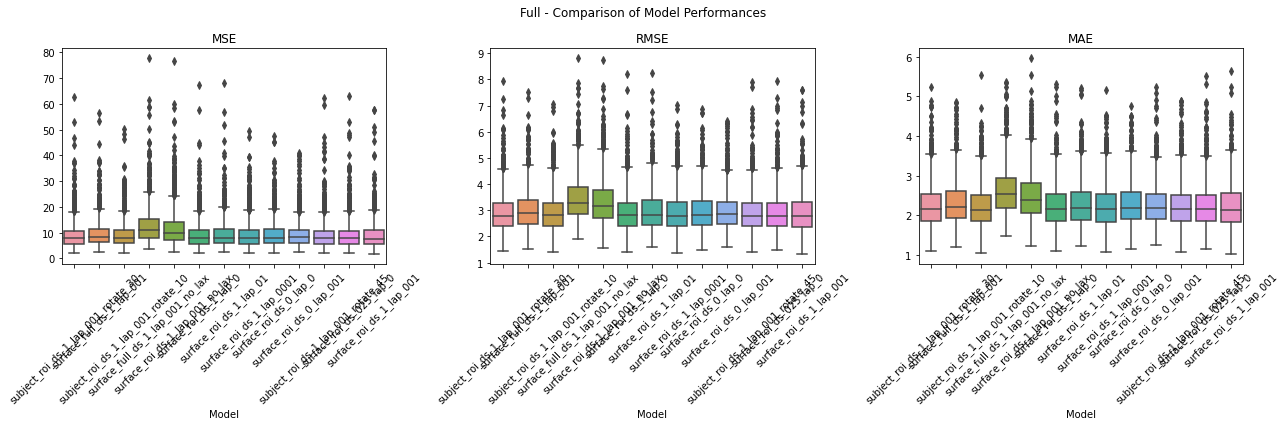

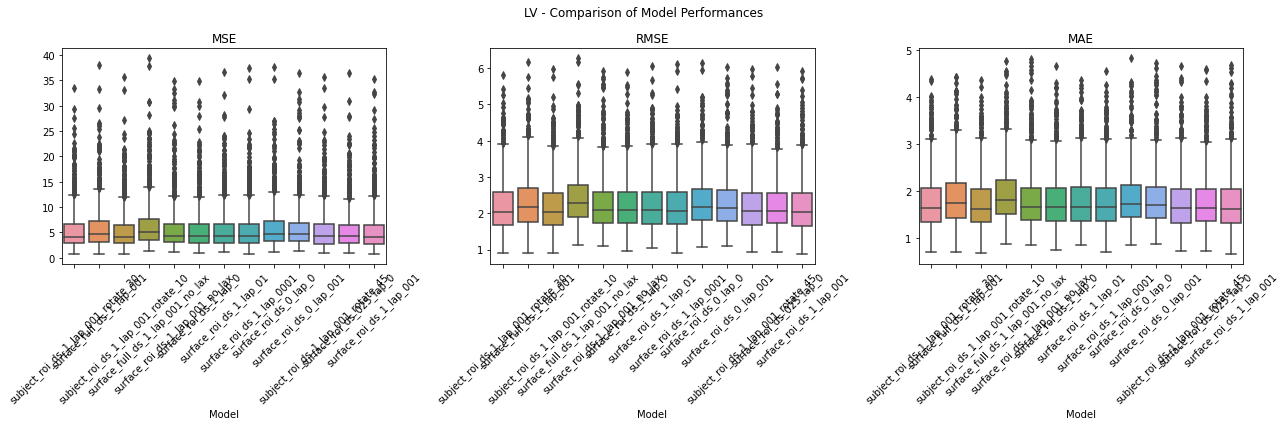

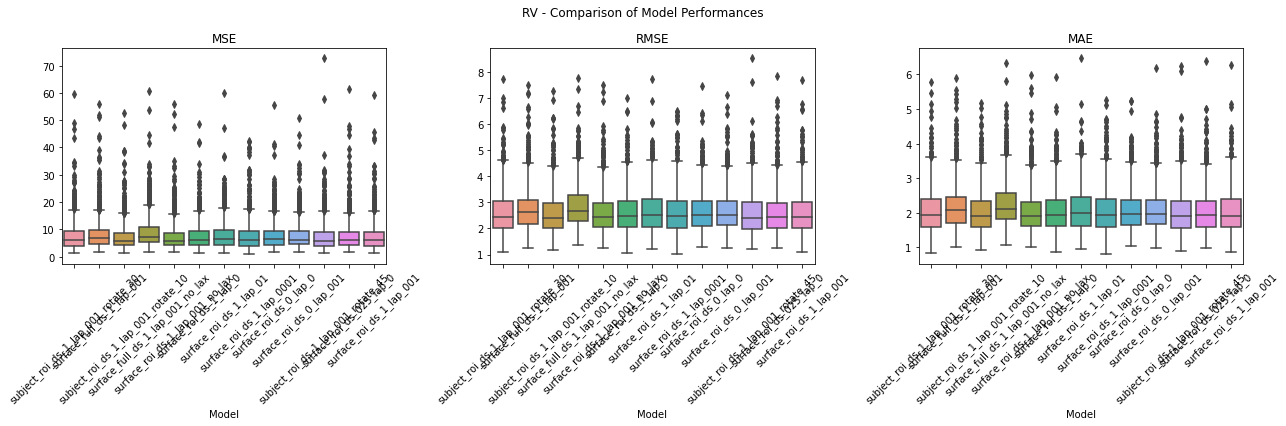

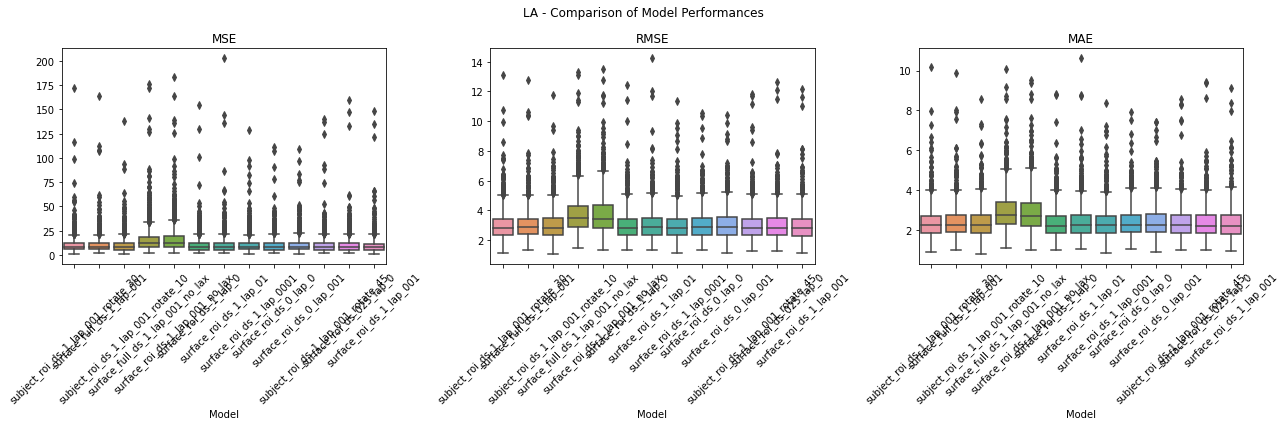

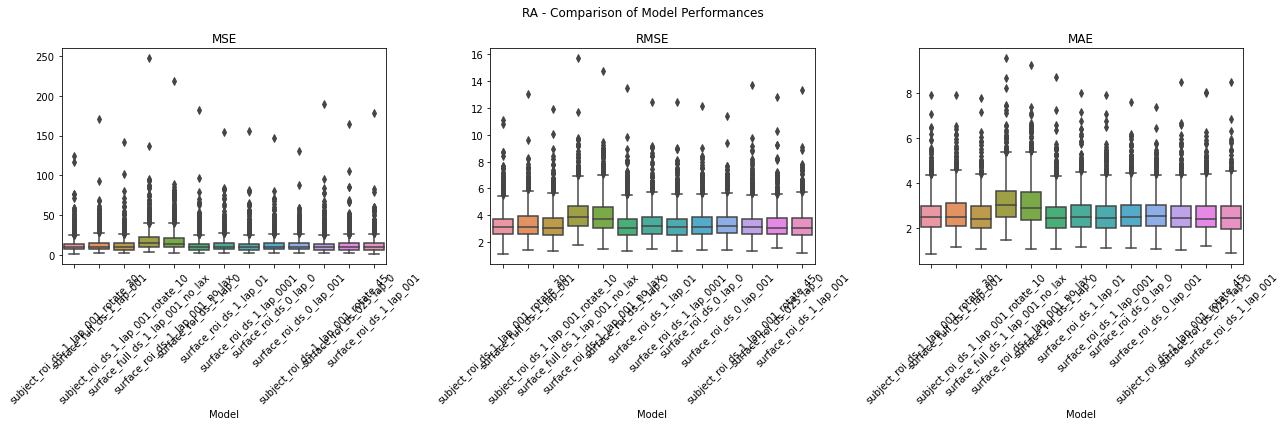

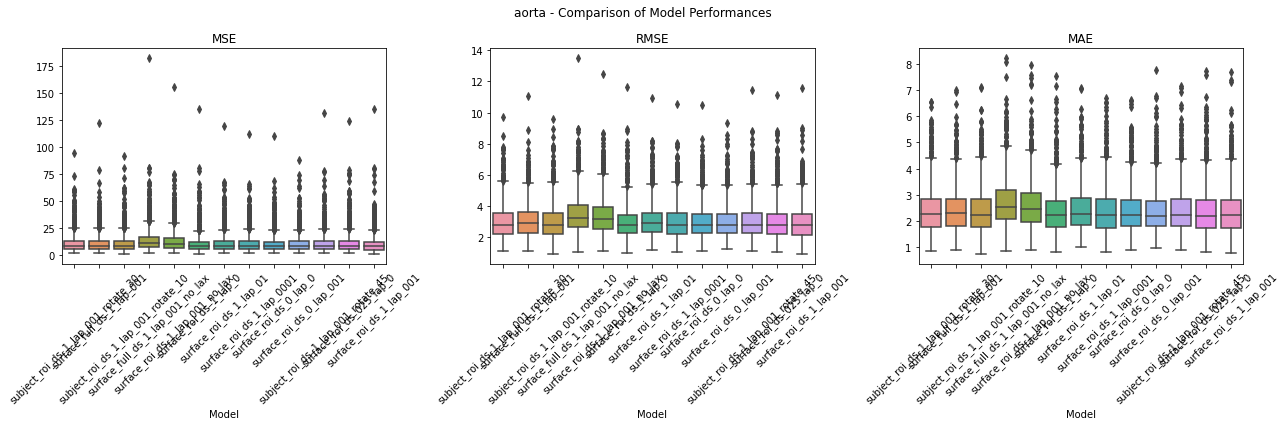

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read and process the evaluation results from a CSV file
def process_results(csv_file, model_name):
    df = pd.read_csv(csv_file)
    df['Model'] = model_name
    return df[['Model', 'Subpart', 'MSE', 'RMSE', 'MAE']]

# Directory containing the evaluation results
results_dir = "../Predictions/Surface/"

# DataFrame to store the evaluation results for each subpart
all_results = pd.DataFrame()

# Iterate over the models in the directory
for model_name in os.listdir(results_dir):
    model_path = os.path.join(results_dir, model_name)
    eval_file = os.path.join(model_path, "eval.csv")
    try:
        assert os.path.exists(eval_file)
    except AssertionError:
        print(f"Missing evaluation results for {model_name}")
        continue
    # Process the evaluation results for the current model
    results = process_results(eval_file, model_name)
    all_results = all_results.append(results, ignore_index=True)

# Create boxplots for MSE, RMSE, and MAE for each subpart
subparts = ['Full', 'LV', 'RV', 'LA', 'RA', 'aorta']
metrics = ['MSE', 'RMSE', 'MAE']

for subpart in subparts:
    fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6))

    for i, metric in enumerate(metrics):
        subset = all_results[all_results['Subpart'] == subpart]
        sns.boxplot(x="Model", y=metric, data=subset, ax=axes[i])
        axes[i].set_title(metric)
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', rotation=45)

    plt.suptitle(f"{subpart} - Comparison of Model Performances")
    plt.tight_layout()
    plt.show()


In [2]:
def get_nice_dataframe_sub(df, metrics, subpart = "Full", vertical = False):
    models = df["Model"].unique()
    df = df.copy()
    df = df[df["Subpart"] == subpart]

    # creates a dataframe where each metric has a column for its mean and std.
    # the mean and std. are computed for each model
    # the dataframe is then saved as a csv file
    df_std = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_std[metric] = df.groupby(["Model"])[metric].std()

    df_mean = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_mean[metric] = df.groupby(["Model"])[metric].mean()

    df_mean = df_mean.round(2)
    df_std = df_std.round(2)

    #combine both dataframes, intercalating columns

    empty_df = pd.DataFrame(columns = metrics)
    for metric in metrics:
        i = 0
        for model in models:
            mean_str = str(df_mean.loc[model, metric]) 
            std_str = str(df_std.loc[model, metric]) 
            if len(mean_str) == 3 or (mean_str[2] == '.' and len(mean_str) == 4):
                mean_str += '0'
            if len(std_str) == 3 or (std_str[2] == '.' and len(std_str) == 4):
                std_str += '0'
              
            empty_df.loc[model, metric] = mean_str + " (" + std_str + ")"
            i+=1

    # transposes the dataframe
    if vertical:
        empty_df = empty_df.T
    
    return empty_df

metrics = ['MAE', 'MSE', 'RMSE']
subparts = ['Full', 'LV', 'RV', 'LA', 'RA', 'aorta']

for subpart in subparts:
    print(subpart)
    nice = get_nice_dataframe_sub(all_results, metrics, subpart, vertical=1)
    display(nice)


Full


,subject_roi_ds_1_lap_001_rotate_30,surface_full_ds_1_lap_001,subject_roi_ds_1_lap_001_rotate_10,surface_full_ds_1_lap_001_no_lax,surface_roi_ds_1_lap_001_no_lax,surface_roi_ds_1_lap_0,surface_roi_ds_1_lap_01,surface_roi_ds_1_lap_0001,surface_roi_ds_0_lap_0,surface_roi_ds_0_lap_001,subject_roi_ds_1_lap_001_rotate_45,surface_roi_ds_025_lap_0,surface_roi_ds_1_lap_001
MAE,2.25 (0.58),2.32 (0.56),2.23 (0.55),2.62 (0.61),2.49 (0.63),2.25 (0.56),2.29 (0.57),2.24 (0.57),2.29 (0.55),2.29 (0.54),2.24 (0.57),2.25 (0.57),2.23 (0.58)
MSE,9.21 (5.57),9.68 (5.46),9.05 (5.22),12.69 (7.18),11.80 (7.13),9.14 (5.49),9.54 (5.68),9.17 (5.41),9.39 (5.26),9.37 (5.12),9.14 (5.68),9.20 (5.69),9.06 (5.58)
RMSE,2.93 (0.78),3.02 (0.76),2.91 (0.75),3.46 (0.87),3.32 (0.90),2.92 (0.77),2.99 (0.78),2.93 (0.78),2.97 (0.75),2.97 (0.73),2.92 (0.78),2.93 (0.78),2.90 (0.79)


LV


,subject_roi_ds_1_lap_001_rotate_30,surface_full_ds_1_lap_001,subject_roi_ds_1_lap_001_rotate_10,surface_full_ds_1_lap_001_no_lax,surface_roi_ds_1_lap_001_no_lax,surface_roi_ds_1_lap_0,surface_roi_ds_1_lap_01,surface_roi_ds_1_lap_0001,surface_roi_ds_0_lap_0,surface_roi_ds_0_lap_001,subject_roi_ds_1_lap_001_rotate_45,surface_roi_ds_025_lap_0,surface_roi_ds_1_lap_001
MAE,1.75 (0.57),1.86 (0.59),1.75 (0.58),1.93 (0.59),1.80 (0.59),1.78 (0.56),1.79 (0.58),1.77 (0.57),1.84 (0.56),1.82 (0.56),1.75 (0.58),1.77 (0.56),1.75 (0.60)
MSE,5.30 (3.80),5.91 (4.11),5.30 (3.85),6.39 (4.35),5.56 (4.12),5.41 (3.80),5.55 (4.01),5.40 (3.90),5.78 (3.89),5.68 (3.97),5.27 (3.83),5.39 (3.79),5.34 (4.08)
RMSE,2.19 (0.71),2.32 (0.73),2.19 (0.72),2.42 (0.74),2.24 (0.73),2.22 (0.70),2.24 (0.73),2.21 (0.72),2.30 (0.69),2.28 (0.70),2.18 (0.72),2.22 (0.69),2.18 (0.75)


RV


,subject_roi_ds_1_lap_001_rotate_30,surface_full_ds_1_lap_001,subject_roi_ds_1_lap_001_rotate_10,surface_full_ds_1_lap_001_no_lax,surface_roi_ds_1_lap_001_no_lax,surface_roi_ds_1_lap_0,surface_roi_ds_1_lap_01,surface_roi_ds_1_lap_0001,surface_roi_ds_0_lap_0,surface_roi_ds_0_lap_001,subject_roi_ds_1_lap_001_rotate_45,surface_roi_ds_025_lap_0,surface_roi_ds_1_lap_001
MAE,2.03 (0.63),2.16 (0.62),2.01 (0.60),2.22 (0.62),2.03 (0.60),2.04 (0.60),2.09 (0.62),2.04 (0.63),2.08 (0.58),2.07 (0.58),2.02 (0.62),2.03 (0.61),2.03 (0.62)
MSE,7.43 (5.33),8.19 (5.52),7.24 (4.99),8.63 (5.42),7.32 (5.04),7.39 (4.83),7.77 (5.11),7.49 (5.25),7.60 (4.83),7.56 (4.81),7.28 (5.25),7.36 (5.21),7.45 (5.20)
RMSE,2.60 (0.83),2.75 (0.81),2.57 (0.78),2.83 (0.79),2.59 (0.78),2.61 (0.77),2.67 (0.80),2.61 (0.83),2.65 (0.76),2.65 (0.75),2.58 (0.80),2.59 (0.79),2.60 (0.81)


LA


,subject_roi_ds_1_lap_001_rotate_30,surface_full_ds_1_lap_001,subject_roi_ds_1_lap_001_rotate_10,surface_full_ds_1_lap_001_no_lax,surface_roi_ds_1_lap_001_no_lax,surface_roi_ds_1_lap_0,surface_roi_ds_1_lap_01,surface_roi_ds_1_lap_0001,surface_roi_ds_0_lap_0,surface_roi_ds_0_lap_001,subject_roi_ds_1_lap_001_rotate_45,surface_roi_ds_025_lap_0,surface_roi_ds_1_lap_001
MAE,2.38 (0.81),2.41 (0.78),2.38 (0.78),2.96 (0.99),2.90 (1.03),2.37 (0.78),2.41 (0.83),2.38 (0.77),2.42 (0.77),2.42 (0.78),2.39 (0.79),2.38 (0.78),2.36 (0.80)
MSE,10.10 (9.42),10.22 (9.37),9.98 (8.44),16.10 (14.26),15.79 (14.52),10.02 (9.16),10.44 (10.62),10.05 (8.69),10.30 (8.51),10.40 (8.49),10.13 (9.55),10.06 (9.54),9.93 (9.38)
RMSE,3.00 (1.04),3.04 (1.00),3.00 (1.00),3.78 (1.34),3.72 (1.39),3.00 (1.02),3.05 (1.07),3.01 (1.01),3.05 (1.01),3.06 (1.01),3.01 (1.03),3.01 (1.01),2.97 (1.04)


RA


,subject_roi_ds_1_lap_001_rotate_30,surface_full_ds_1_lap_001,subject_roi_ds_1_lap_001_rotate_10,surface_full_ds_1_lap_001_no_lax,surface_roi_ds_1_lap_001_no_lax,surface_roi_ds_1_lap_0,surface_roi_ds_1_lap_01,surface_roi_ds_1_lap_0001,surface_roi_ds_0_lap_0,surface_roi_ds_0_lap_001,subject_roi_ds_1_lap_001_rotate_45,surface_roi_ds_025_lap_0,surface_roi_ds_1_lap_001
MAE,2.60 (0.81),2.65 (0.82),2.57 (0.78),3.18 (0.98),3.07 (0.99),2.57 (0.82),2.64 (0.83),2.57 (0.82),2.62 (0.79),2.64 (0.77),2.59 (0.82),2.59 (0.82),2.55 (0.80)
MSE,12.14 (9.65),12.61 (10.04),11.91 (9.53),18.45 (14.51),17.64 (14.04),12.03 (10.32),12.61 (10.13),12.00 (9.88),12.36 (9.62),12.43 (8.95),12.15 (10.59),12.17 (10.27),11.75 (9.74)
RMSE,3.31 (1.09),3.37 (1.11),3.28 (1.07),4.09 (1.33),3.97 (1.36),3.29 (1.11),3.37 (1.12),3.28 (1.10),3.35 (1.08),3.37 (1.04),3.30 (1.13),3.31 (1.12),3.25 (1.09)


aorta


,subject_roi_ds_1_lap_001_rotate_30,surface_full_ds_1_lap_001,subject_roi_ds_1_lap_001_rotate_10,surface_full_ds_1_lap_001_no_lax,surface_roi_ds_1_lap_001_no_lax,surface_roi_ds_1_lap_0,surface_roi_ds_1_lap_01,surface_roi_ds_1_lap_0001,surface_roi_ds_0_lap_0,surface_roi_ds_0_lap_001,subject_roi_ds_1_lap_001_rotate_45,surface_roi_ds_025_lap_0,surface_roi_ds_1_lap_001
MAE,2.41 (0.89),2.44 (0.85),2.39 (0.87),2.73 (0.93),2.61 (0.92),2.38 (0.86),2.44 (0.87),2.39 (0.88),2.40 (0.85),2.38 (0.85),2.41 (0.90),2.39 (0.91),2.36 (0.87)
MSE,10.48 (8.87),10.69 (8.74),10.29 (8.75),13.69 (11.26),12.77 (10.69),10.23 (9.17),10.75 (9.10),10.35 (8.91),10.31 (8.47),10.22 (8.31),10.55 (9.45),10.47 (9.63),10.09 (9.06)
RMSE,3.03 (1.13),3.08 (1.09),3.01 (1.11),3.49 (1.22),3.36 (1.22),3.00 (1.11),3.08 (1.12),3.01 (1.13),3.03 (1.07),3.02 (1.06),3.04 (1.15),3.02 (1.16),2.97 (1.11)


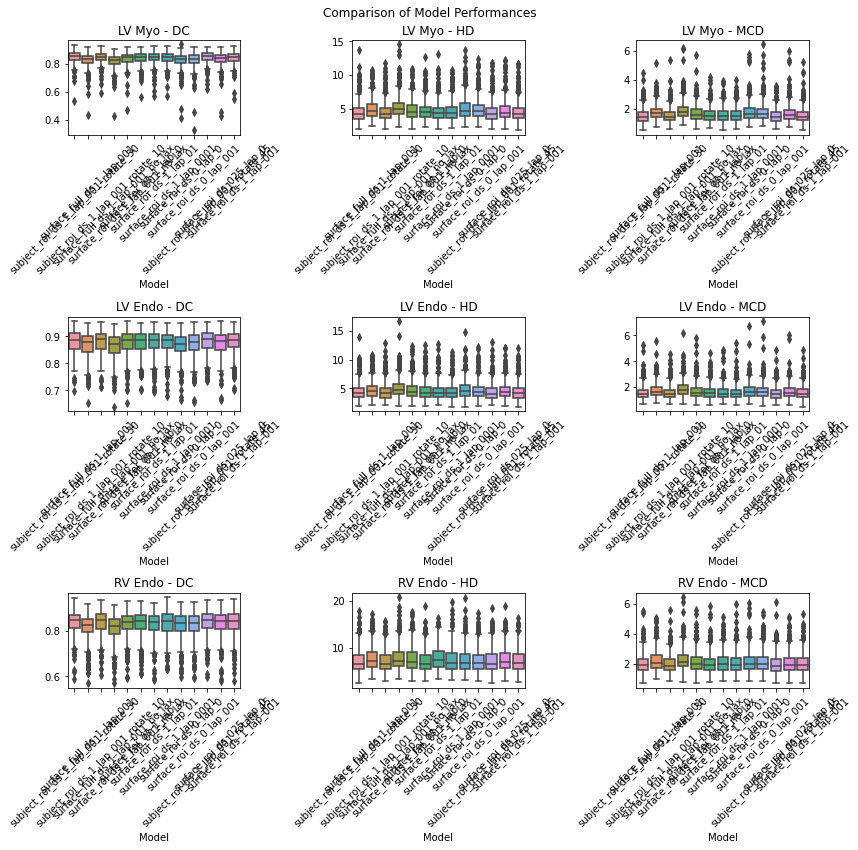

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read and process the evaluation results from a CSV file
def process_results(csv_file, model_name):
    df = pd.read_csv(csv_file)
    df['Model'] = model_name
    return df

# Directory containing the evaluation results
results_dir = "../Predictions/Surface/"

# DataFrame to store the evaluation results for each subpart
all_results = pd.DataFrame()

# Iterate over the models in the directory
for model_name in os.listdir(results_dir):
    model_path = os.path.join(results_dir, model_name)
    eval_file = os.path.join(model_path, "metrics.csv")

    if not os.path.exists(eval_file):
        continue
    
    # Process the evaluation results for the current model
    results = process_results(eval_file, model_name)
    all_results = all_results.append(results, ignore_index=True)

metrics = ['LV Myo - DC', 'LV Myo - HD', 'LV Myo - MCD', 
           'LV Endo - DC', 'LV Endo - HD', 'LV Endo - MCD', 
           'RV Endo - DC', 'RV Endo - HD', 'RV Endo - MCD']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, metric in enumerate(metrics):
    sns.boxplot(x="Model", y=metric, data=all_results, ax=axes[i // 3, i%3])
    axes[i // 3, i%3].set_title(metric)
    axes[i // 3, i%3].set_ylabel('')
    axes[i // 3, i%3].tick_params(axis='x', rotation=45)

plt.suptitle("Comparison of Model Performances")
plt.tight_layout()
plt.show()


In [4]:
def get_nice_dataframe(df, metrics, vertical = False):
    models = df["Model"].unique()

    # creates a dataframe where each metric has a column for its mean and std.
    # the mean and std. are computed for each model
    # the dataframe is then saved as a csv file
    df_std = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_std[metric] = df.groupby(["Model"])[metric].std()

    df_mean = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_mean[metric] = df.groupby(["Model"])[metric].mean()

    df_mean = df_mean.round(2)
    df_std = df_std.round(2)

    #combine both dataframes, intercalating columns

    empty_df = pd.DataFrame(columns = metrics)
    for metric in metrics:
        i = 0
        for model in models:
            mean_str = str(df_mean.loc[model, metric]) 
            std_str = str(df_std.loc[model, metric]) 
            if len(mean_str) == 3 or (mean_str[2] == '.' and len(mean_str) == 4):
                mean_str += '0'
            if len(std_str) == 3 or (std_str[2] == '.' and len(std_str) == 4):
                std_str += '0'
              
            empty_df.loc[model, metric] = mean_str + " (" + std_str + ")"
            i+=1

    # transposes the dataframe
    if vertical:
        empty_df = empty_df.T
    
    return empty_df


metrics = ['LV Endo - DC', 'LV Endo - HD', 'LV Endo - MCD', 
           'LV Myo - DC', 'LV Myo - HD', 'LV Myo - MCD', 
           'RV Endo - DC', 'RV Endo - HD', 'RV Endo - MCD']


#metrics = ["LA 2CH - DC", "LA 2CH - HD", "LA 2CH - MCD",
#            "LA 4CH - DC", "LA 4CH - HD", "LA 4CH - MCD",
#            "RA 4CH - DC", "RA 4CH - HD", "RA 4CH - MCD"]

nice = get_nice_dataframe(all_results, metrics, vertical=1)

nice["MCSI-Net-Paper"] = ["0.88 (0.05)", "7.06 (2.64)", "1.86 (0.79)",
                    "0.78 (0.08)", "4.75 (1.76)", "1.86 (0.82)", 
                    "0.85 (0.06)", "7.06 (2.64)", "2.27 (0.95)"]

display(nice)

,subject_roi_ds_1_lap_001_rotate_30,surface_full_ds_1_lap_001,subject_roi_ds_1_lap_001_rotate_10,surface_full_ds_1_lap_001_no_lax,surface_roi_ds_1_lap_001_no_lax,surface_roi_ds_1_lap_0,surface_roi_ds_1_lap_01,surface_roi_ds_1_lap_0001,surface_roi_ds_0_lap_0,surface_roi_ds_0_lap_001,subject_roi_ds_1_lap_001_rotate_45,surface_roi_ds_025_lap_0,surface_roi_ds_1_lap_001,MCSI-Net-Paper
LV Endo - DC,0.88 (0.04),0.87 (0.04),0.88 (0.04),0.86 (0.04),0.88 (0.04),0.88 (0.04),0.88 (0.04),0.88 (0.04),0.87 (0.04),0.87 (0.04),0.88 (0.04),0.88 (0.04),0.88 (0.04),0.88 (0.05)
LV Endo - HD,4.40 (1.44),4.75 (1.44),4.42 (1.44),4.99 (1.55),4.62 (1.48),4.55 (1.45),4.40 (1.42),4.44 (1.41),4.76 (1.45),4.63 (1.47),4.37 (1.43),4.60 (1.45),4.42 (1.43),7.06 (2.64)
LV Endo - MCD,1.56 (0.52),1.73 (0.56),1.56 (0.51),1.84 (0.59),1.67 (0.57),1.59 (0.52),1.57 (0.51),1.57 (0.51),1.73 (0.57),1.70 (0.61),1.54 (0.49),1.65 (0.54),1.56 (0.51),1.86 (0.79)
LV Myo - DC,0.85 (0.04),0.83 (0.05),0.85 (0.04),0.82 (0.05),0.84 (0.04),0.84 (0.04),0.84 (0.04),0.84 (0.04),0.83 (0.05),0.83 (0.05),0.85 (0.04),0.83 (0.04),0.85 (0.04),0.78 (0.08)
LV Myo - HD,4.45 (1.40),4.96 (1.41),4.47 (1.38),5.25 (1.55),4.78 (1.44),4.65 (1.34),4.54 (1.38),4.64 (1.37),5.03 (1.52),4.87 (1.45),4.49 (1.41),4.75 (1.47),4.52 (1.39),4.75 (1.76)
LV Myo - MCD,1.50 (0.49),1.75 (0.54),1.51 (0.50),1.88 (0.62),1.67 (0.55),1.57 (0.49),1.56 (0.50),1.55 (0.49),1.75 (0.61),1.74 (0.63),1.50 (0.48),1.66 (0.58),1.54 (0.52),1.86 (0.82)
RV Endo - DC,0.84 (0.05),0.82 (0.05),0.84 (0.05),0.81 (0.05),0.83 (0.05),0.83 (0.05),0.83 (0.05),0.83 (0.05),0.83 (0.05),0.83 (0.05),0.84 (0.05),0.83 (0.05),0.84 (0.05),0.85 (0.06)
RV Endo - HD,7.18 (2.43),7.73 (2.46),7.17 (2.40),7.82 (2.52),7.55 (2.51),7.26 (2.45),7.92 (2.52),7.36 (2.55),7.27 (2.48),7.23 (2.43),7.20 (2.53),7.53 (2.54),7.23 (2.47),7.06 (2.64)
RV Endo - MCD,1.98 (0.62),2.19 (0.66),1.97 (0.59),2.25 (0.67),2.09 (0.65),2.02 (0.64),2.07 (0.63),2.03 (0.66),2.12 (0.69),2.10 (0.68),1.97 (0.63),2.06 (0.66),1.99 (0.64),2.27 (0.95)
